# Dataset Description:
This dataset appears to focus on analyzing and predicting car prices based on various features. 

Dataset Features:

Brand (Categorical) – The manufacturer of the car (e.g., Kia, Audi, Chevrolet).

Model (Categorical) – The specific model name of the car.

Year (Numerical) – The manufacturing year of the car, which typically affects depreciation.

Engine_Size (Numerical) – The engine capacity, usually measured in liters (L). Larger engines may impact performance and fuel consumption.

Fuel_Type (Categorical) – The type of fuel the car uses (e.g., Diesel, Petrol, Hybrid, Electric).

Transmission (Categorical) – The transmission type (e.g., Manual, Automatic, Semi-Automatic).

Mileage (Numerical) – The total distance traveled by the car in kilometers, influencing wear and tear.

Doors (Numerical) – Number of car doors, indicating vehicle size and style.

Owner_Count (Numerical) – Number of previous owners, often linked to vehicle reliability and condition.

Price (Target Variable) – The selling price of the car, which is the main focus of prediction and analysis.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
data =pd.read_csv("car_price_dataset.csv")
data

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [3]:
data.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [4]:
brand=pd.get_dummies(data['Brand'])

In [5]:
print(brand)

      Audi  BMW  Chevrolet  Ford  Honda  Hyundai  Kia  Mercedes  Toyota  \
0        0    0          0     0      0        0    1         0       0   
1        0    0          1     0      0        0    0         0       0   
2        0    0          0     0      0        0    0         1       0   
3        1    0          0     0      0        0    0         0       0   
4        0    0          0     0      0        0    0         0       0   
...    ...  ...        ...   ...    ...      ...  ...       ...     ...   
9995     0    0          0     0      0        0    1         0       0   
9996     0    0          1     0      0        0    0         0       0   
9997     0    1          0     0      0        0    0         0       0   
9998     0    0          0     1      0        0    0         0       0   
9999     0    0          0     0      0        0    0         0       0   

      Volkswagen  
0              0  
1              0  
2              0  
3              0  
4   

In [6]:
model=pd.get_dummies(data['Model'])

In [7]:
print(model)

      3 Series  5 Series  A3  A4  Accord  C-Class  CR-V  Camry  Civic  \
0            0         0   0   0       0        0     0      0      0   
1            0         0   0   0       0        0     0      0      0   
2            0         0   0   0       0        0     0      0      0   
3            0         0   0   0       0        0     0      0      0   
4            0         0   0   0       0        0     0      0      0   
...        ...       ...  ..  ..     ...      ...   ...    ...    ...   
9995         0         0   0   0       0        0     0      0      0   
9996         0         0   0   0       0        0     0      0      0   
9997         1         0   0   0       0        0     0      0      0   
9998         0         0   0   0       0        0     0      0      0   
9999         0         0   0   0       0        0     0      0      0   

      Corolla  ...  Optima  Passat  Q5  RAV4  Rio  Sonata  Sportage  Tiguan  \
0           0  ...       0       0   0     0

In [8]:
fueltype=pd.get_dummies(data['Fuel_Type'])

In [9]:
print(fueltype)

      Diesel  Electric  Hybrid  Petrol
0          1         0       0       0
1          0         0       1       0
2          1         0       0       0
3          0         1       0       0
4          0         0       1       0
...      ...       ...     ...     ...
9995       1         0       0       0
9996       0         1       0       0
9997       0         0       0       1
9998       0         0       1       0
9999       1         0       0       0

[10000 rows x 4 columns]


In [10]:
transmission=pd.get_dummies(data['Transmission'])

In [11]:
print(transmission)

      Automatic  Manual  Semi-Automatic
0             0       1               0
1             1       0               0
2             1       0               0
3             0       1               0
4             0       0               1
...         ...     ...             ...
9995          0       0               1
9996          1       0               0
9997          1       0               0
9998          1       0               0
9999          0       1               0

[10000 rows x 3 columns]


In [12]:
data.drop(["Brand","Model","Fuel_Type","Transmission"],axis=1,inplace=True)

In [13]:
data=pd.concat([data,brand,model,fueltype,transmission],axis=1)

In [14]:
data

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Audi,BMW,Chevrolet,Ford,...,Tiguan,Tucson,X5,Diesel,Electric,Hybrid,Petrol,Automatic,Manual,Semi-Automatic
0,2020,4.2,289944,3,5,8501,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2012,2.0,5356,2,3,12092,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,2020,4.2,231440,4,2,11171,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,2023,2.0,160971,2,1,11780,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2003,2.6,286618,3,3,2867,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9996,2002,1.4,168000,2,1,6240,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
9997,2010,3.0,86664,5,1,9866,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
9998,2002,1.4,225772,4,1,4084,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            10000 non-null  int64  
 1   Engine_Size     10000 non-null  float64
 2   Mileage         10000 non-null  int64  
 3   Doors           10000 non-null  int64  
 4   Owner_Count     10000 non-null  int64  
 5   Price           10000 non-null  int64  
 6   Audi            10000 non-null  uint8  
 7   BMW             10000 non-null  uint8  
 8   Chevrolet       10000 non-null  uint8  
 9   Ford            10000 non-null  uint8  
 10  Honda           10000 non-null  uint8  
 11  Hyundai         10000 non-null  uint8  
 12  Kia             10000 non-null  uint8  
 13  Mercedes        10000 non-null  uint8  
 14  Toyota          10000 non-null  uint8  
 15  Volkswagen      10000 non-null  uint8  
 16  3 Series        10000 non-null  uint8  
 17  5 Series        10000 non-null  

In [16]:
data.isnull().sum()

Year              0
Engine_Size       0
Mileage           0
Doors             0
Owner_Count       0
Price             0
Audi              0
BMW               0
Chevrolet         0
Ford              0
Honda             0
Hyundai           0
Kia               0
Mercedes          0
Toyota            0
Volkswagen        0
3 Series          0
5 Series          0
A3                0
A4                0
Accord            0
C-Class           0
CR-V              0
Camry             0
Civic             0
Corolla           0
E-Class           0
Elantra           0
Equinox           0
Explorer          0
Fiesta            0
Focus             0
GLA               0
Golf              0
Impala            0
Malibu            0
Optima            0
Passat            0
Q5                0
RAV4              0
Rio               0
Sonata            0
Sportage          0
Tiguan            0
Tucson            0
X5                0
Diesel            0
Electric          0
Hybrid            0
Petrol            0


In [17]:
reg=linear_model.LinearRegression()
reg.fit(data.drop('Price',axis='columns'),data.Price)

LinearRegression()

In [18]:
reg.coef_

array([ 2.98601356e+02,  9.92739310e+02, -1.98902435e-02, -5.50438441e-01,
        3.58753368e-02, -4.75228771e+08, -3.85389627e+08, -9.59820103e+07,
       -1.55870801e+08, -1.40128767e+08, -1.01244353e+08, -2.90216842e+08,
       -5.67867044e+07, -5.36410586e+08, -6.95843073e+08,  1.18799469e+08,
        1.18799462e+08,  2.08638611e+08,  2.08638607e+08, -1.26461388e+08,
       -2.09803452e+08, -1.26461389e+08,  2.69820423e+08, -1.26461381e+08,
        2.69820426e+08, -2.09803455e+08, -1.65345809e+08, -1.70608152e+08,
       -1.10719356e+08, -1.10719358e+08, -1.10719355e+08, -2.09803445e+08,
        4.29252913e+08, -1.70608147e+08, -1.70608149e+08,  2.36266893e+07,
        4.29252914e+08,  2.08638609e+08,  2.69820434e+08,  2.36266894e+07,
       -1.65345808e+08,  2.36266899e+07,  4.29252913e+08, -1.65345805e+08,
        1.18799474e+08, -1.50860831e+08, -1.50858843e+08, -1.50859841e+08,
       -1.50860830e+08, -4.01917189e+08, -4.01918679e+08, -4.01918681e+08])

In [19]:
reg.intercept_

818776604.2930918

In [25]:
data

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Audi,BMW,Chevrolet,Ford,...,Tiguan,Tucson,X5,Diesel,Electric,Hybrid,Petrol,Automatic,Manual,Semi-Automatic
0,2020,4.2,289944,3,5,8501,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2012,2.0,5356,2,3,12092,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,2020,4.2,231440,4,2,11171,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,2023,2.0,160971,2,1,11780,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2003,2.6,286618,3,3,2867,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9996,2002,1.4,168000,2,1,6240,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
9997,2010,3.0,86664,5,1,9866,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
9998,2002,1.4,225772,4,1,4084,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


<Axes: xlabel='Price', ylabel='count'>

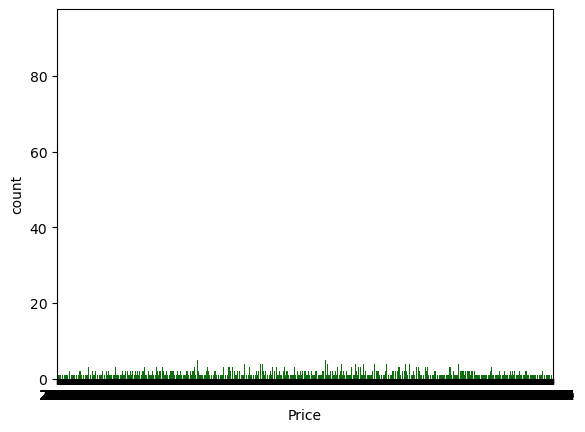

In [42]:
sns.countplot(x="Price",data=data,color="green")

Text(0.5, 1.0, 'Distribution of car price')

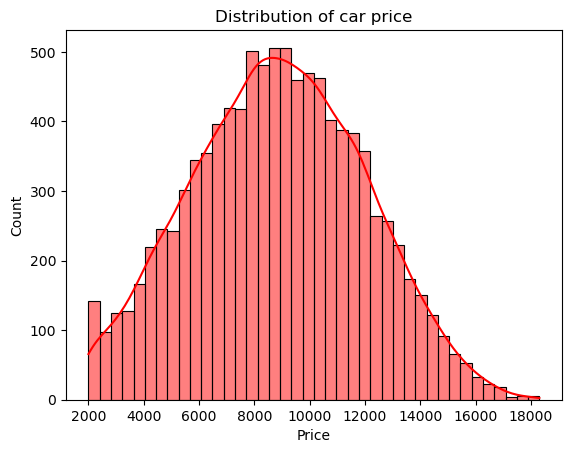

In [27]:
sns.histplot(data["Price"],kde=True,color="red")
plt.title("Distribution of car price")

Text(0.5, 1.0, 'Enginesize vs price')

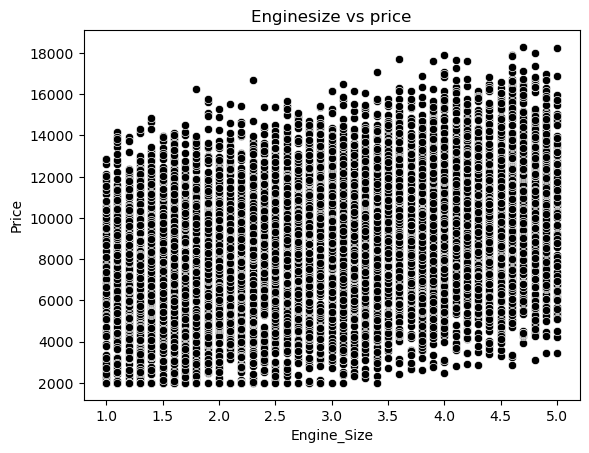

In [31]:
sns.scatterplot(x="Engine_Size",y="Price",data=data,color="black")
plt.title("Enginesize vs price")

Text(0.5, 1.0, 'ownercount vs price')

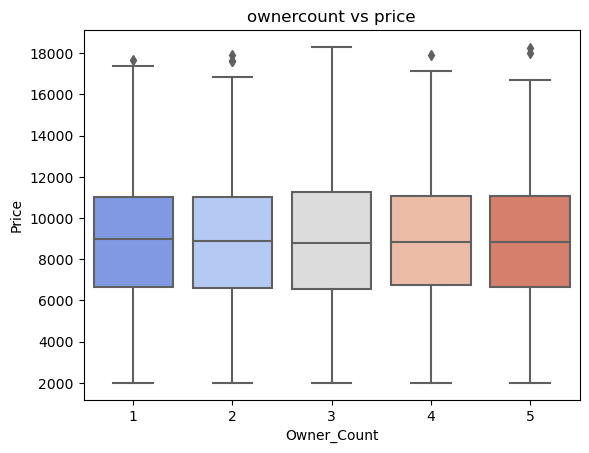

In [34]:
sns.boxplot(x="Owner_Count",y="Price",data=data,palette="coolwarm")
plt.title("ownercount vs price")

Text(0.5, 1.0, 'No of doors')

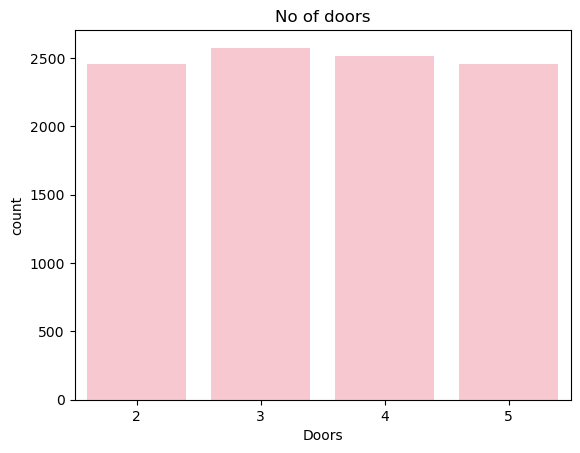

In [36]:
sns.countplot(x="Doors",data=data,color="pink")
plt.title("No of doors")

Text(0.5, 1.0, 'ownercount')

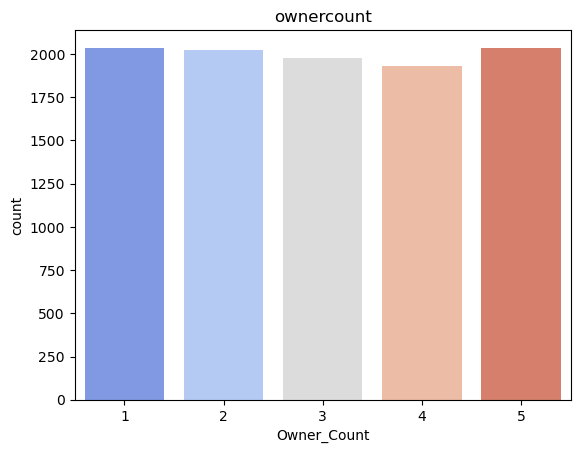

In [43]:
sns.countplot(x="Owner_Count",data=data,palette="coolwarm")
plt.title("ownercount")

Text(0.5, 1.0, 'CarYear vs price')

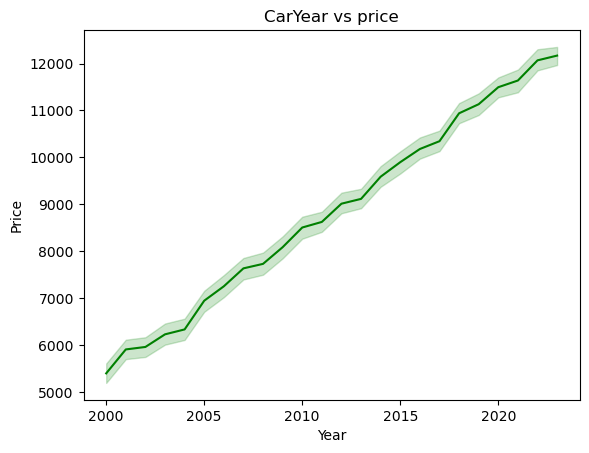

In [32]:
sns.lineplot(x="Year",y="Price",data=data,color="green")
plt.title("CarYear vs price")

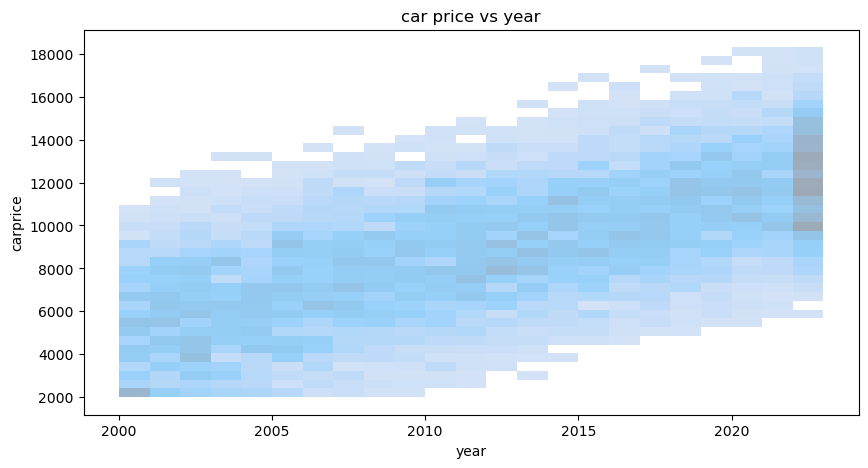

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(x=data['Year'],y=data['Price'],alpha=0.5)
plt.title("car price vs year")
plt.xlabel("year")
plt.ylabel("carprice")
plt.show()

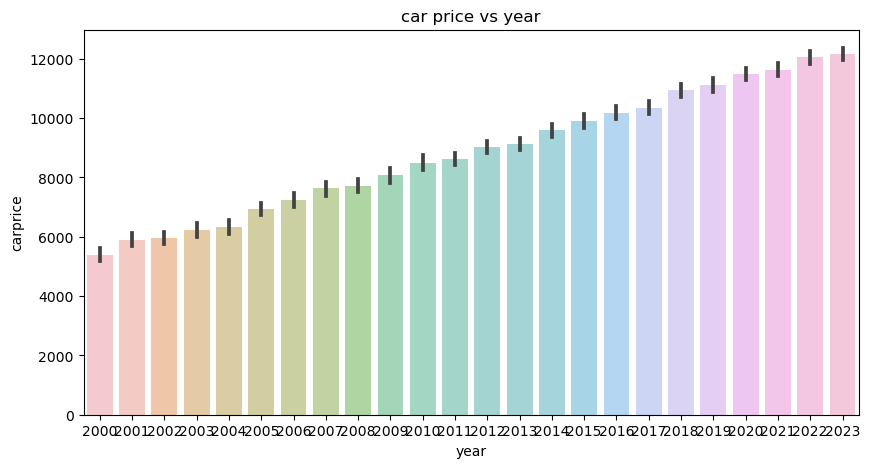

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x=data['Year'],y=data['Price'],alpha=0.5)
plt.title("car price vs year")
plt.xlabel("year")
plt.ylabel("carprice")
plt.show()


Text(0.5, 1.0, 'ownercount vs price')

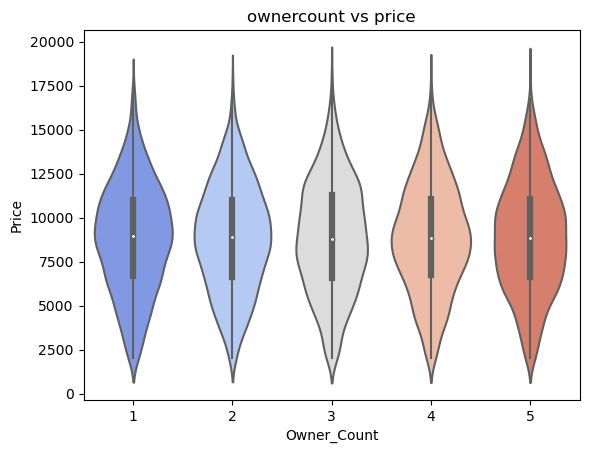

In [38]:
sns.violinplot(x="Owner_Count",y="Price",data=data,palette="coolwarm")
plt.title("ownercount vs price")

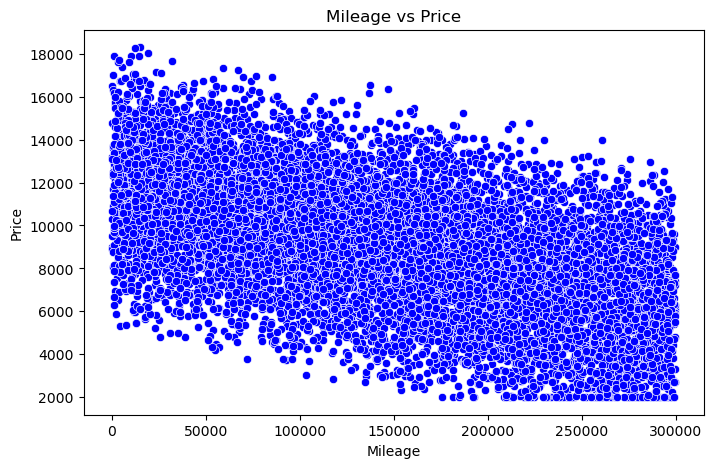

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Mileage', y='Price', data=data, color='blue')
plt.title('Mileage vs Price')
plt.show()


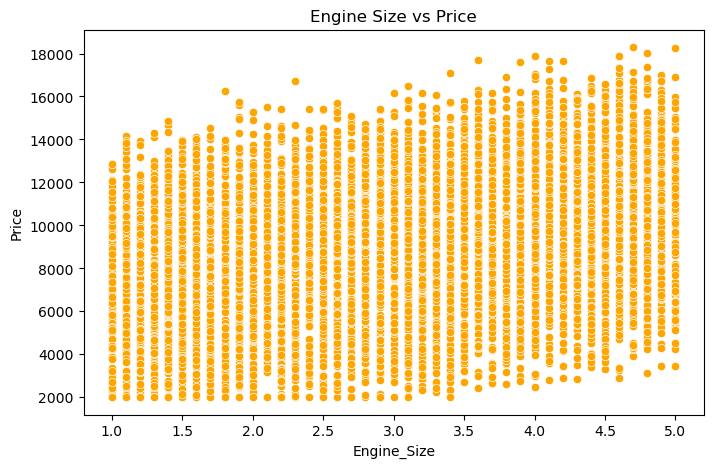

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Engine_Size', y='Price', data=data, color='orange')
plt.title('Engine Size vs Price')
plt.show()


 Dataset  Observation

The dataset shows a wide range of car prices, with some extreme outliers in higher price brackets.
Certain brands tend to dominate the higher-end market segment.
The dataset shows a wide range of car prices, with some extreme outliers in higher price brackets.
Certain brands tend to dominate the higher-end market segment.Mileage shows an inverse correlation with price — higher mileage cars are generally priced lower due to wear and tear.
Luxury brands often have lower mileage yet maintain high prices due to brand value and build quality.
Diesel and Petrol cars are more common, with petrol cars generally having a wider price range.
Hybrid and Electric vehicles may command higher prices but are less common in the dataset.
Automatic transmission cars are often priced higher, indicating a preference in premium models.
Manual transmission cars are generally more affordable.
Newer models generally have higher prices, reflecting improved features, technology, and lower mileage.


#
